# WELCOME TO MACHINE LEARNING

This Notebook shows how you can use different machine learning models using sklearn, pandas, scipy, numpy, matplotlib libraries in python. It shows both regression models and classsification models accuracy on a dataset.

Dataset Description: For simplicity I used the Iris dataset as the motive is to introduce others to machine learning.

In [3]:
#Try print your name first if you are beginner to python 
first_name ="Ashish"
last_name="Kumar"
print(first_name + ' ' + last_name)

Ashish Kumar


In [6]:
from sklearn import datasets #import library

In [9]:
iris_dataset = datasets.load_iris() #load dataset

In [16]:
X=iris_dataset.data[:,:2]

In [18]:
#finding total entries min, max and mean at once 
x_count = len(X.flat)
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
x_mean = X[:, 0].mean()

In [20]:
x_count, x_min, x_max, x_mean

(300, 3.8, 8.4, 5.843333333333334)

In [32]:
#import libraries
import pandas 
print('pandas version: {} '.format(pandas.__version__))
import sys
print('sys version: {} '.format(sys.version))
import scipy 
print('scipy version: {} '.format(scipy.__version__))
import numpy
print('numpy version: {} '.format(numpy.__version__))
import matplotlib
print('matplotlib version: {} '.format(matplotlib.__version__))
import sklearn
print('sklearn version: {} '.format(sklearn.__version__))

pandas version: 0.24.2 
sys version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)] 
scipy version: 1.2.1 
numpy version: 1.16.4 
matplotlib version: 3.1.0 
sklearn version: 0.21.2 


In [40]:
#calling out what we need
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length' ,'sepal-width' ,'petal-length','petal-width','class']
dataset = pandas.read_csv(url, names=names)

In [49]:
#finding shape of dataset
print(dataset.shape)

(150, 5)


In [50]:
#printing entries of dataset
print(dataset.head)

<bound method NDFrame.head of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12      

In [52]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [53]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


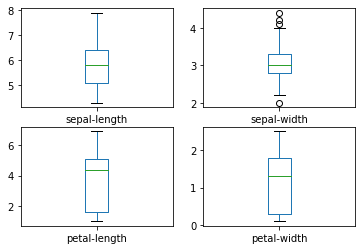

In [57]:
#making boxplot
dataset.plot(kind='box', subplots = True, layout=(2,2), sharex = False, sharey = False)
plt.show()

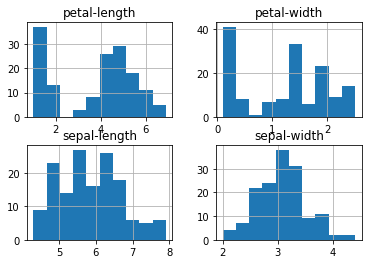

In [58]:
dataset.hist()
plt.show()

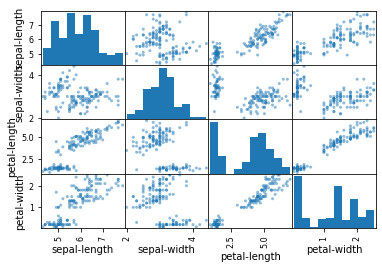

In [60]:
#making scatter matrix
scatter_matrix(dataset)
plt.show()

In [63]:
#dividing into train test 
array = dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=6
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [64]:
seed =6
scoring ='accuracy' #we will compare accuracy here

In [78]:
#all the models we will use are mentioned below
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

results =[]
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results=model_selection.cross_val_score(model, X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.941667 (0.038188)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.950000 (0.040825)
NB: 0.966667 (0.055277)
SVM: 0.966667 (0.055277)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

# Creating scatter plots

we have taken another dataset here of BRAIN now.

In [7]:
#import library / load dataset / check the dataset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(20.0,10.0)
url = "https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv"
dataset = pd.read_csv(url)
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
X=dataset['Head Size(cm^3)'].values
Y=dataset['Brain Weight(grams)'].values

In [107]:
#mean x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

m=len(X) #total number of values

numer=0
denom=0

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)
print(b1, b0)

0.26342933948939945 325.57342104944223


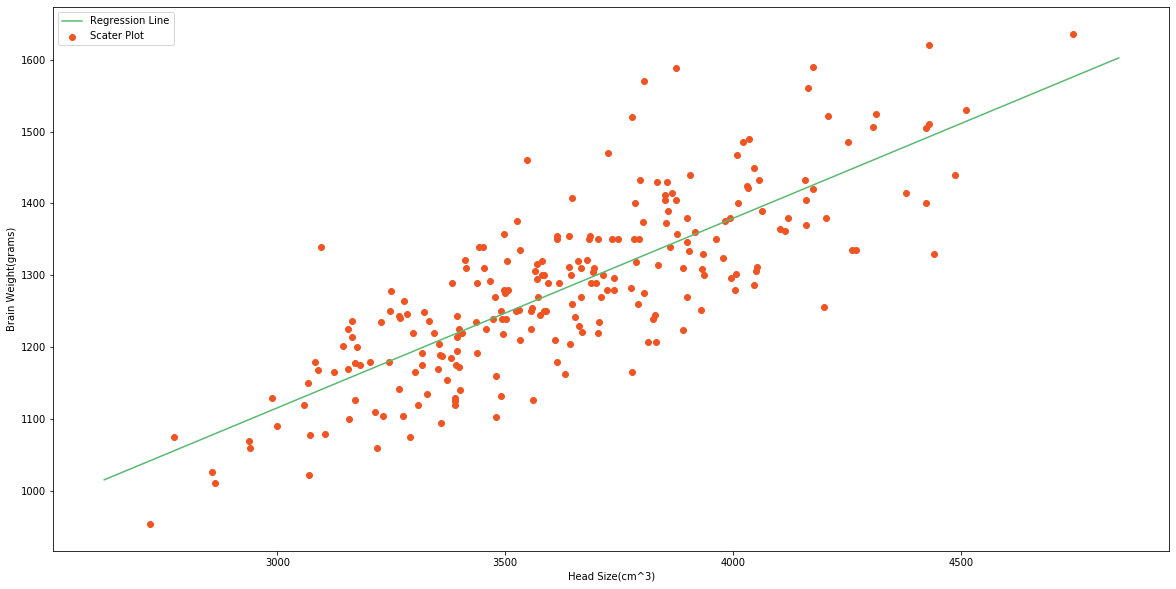

In [112]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x,max_x,1000)
y= b0 + b1 * x
#plotting line 
plt.plot(x,y,color='#58b970', label='Regression Line')
#scatter plot
plt.scatter(X,Y,c='#ef5423', label='Scater Plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [117]:
#lets find R^2 score 
ss_t=0
ss_r=0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1- (ss_r/ss_t)
print(r2)

0.6393117199570003


In [126]:
#Checking for LR model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#cannot use rank 1 matrix in sklearn
X= X.reshape((m,1))
#creating model
reg = LinearRegression()
#fitting training data
red=reg.fit(X,Y)
# Y prediction 
Y_pred = reg.predict(X)
#calculating R2 score
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
